<a href="https://colab.research.google.com/github/mipt-alexa/computational-math-course/blob/main/11_theme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

##9.1


В первом случае краевая задача жёсткая, будем решать методом прогонки


$y'' - (10+t^2)y = t exp(-t)$

$\frac{1}{h^2} (y_{n+1} - 2y_n + y_{n-1}) - (10 + t_n^2)y_n = t_n e^{-t_n}$

$t \in [0,10]$

представим решение как $y = c_1 y_1 + c_2 y_2 + y_0$

###1.
краевые условия $y_0(0) =0, y_0'(10) =0 $ для неоднородного уравнения

на правом краю $y_{n-1} = y_n + h^2/2 (t_n e^{-t_n} + (10+t_n^2)y_n)$


###2.
$y_1(0) = 1, y_1'(10) = 0$

###3.
$y_1(0) = 0, y_1'(10) = 1$

на правом краю $y_{n-1} = y_n + h + h^2/2 ((10+t_n^2)y_n)$

In [13]:
def calc_y0(N = 200):
    h = 10 / N

    t = np.linspace(0, 10, N)
    y = np.zeros(N)
    A = np.zeros([N,N])
    b = np.zeros(N)

    for i in range(1,N-1):
        A[i][i-1] = 1/h**2
        A[i][i] = -(10 + t[i]**2) - 2/h**2
        if i != N-1:
            A[i][i+1] = 1/h**2
        b[i] = t[i]*np.exp(-t[i])

    A[0][0] = 1
    A[N-1][N-2] = 2/h**2

    y = np.linalg.solve(A, b)
    return t, y


In [17]:
def calc_y1(N = 200):
    h = 10 / N

    t = np.linspace(0, 10, N)

    y = np.zeros(N)
    A = np.zeros([N,N])
    b = np.zeros(N)

    for i in range(1,N-1):
        A[i][i-1] = 1/h**2
        A[i][i] = -(10 + t[i]**2) - 2/h**2
        if i != N-1:
            A[i][i+1] = 1/h**2

    b[0] = 1
    A[0][0] = 1
    A[N-1][N-2] = 2/h**2

    y = np.linalg.solve(A, b)
    return y

In [31]:
def calc_y2(N = 200):
    h = 10 / N

    t = np.linspace(0, 10, N)

    y = np.zeros(N)
    A = np.zeros([N,N])
    b = np.zeros(N)

    for i in range(1,N-1):
        A[i][i-1] = 1/h**2
        A[i][i] = -(10 + t[i]**2) - 2/h**2
        if i != N-1:
            A[i][i+1] = 1/h**2

    b[N-1] = 2/h
    A[0][0] = 1
    A[N-1][N-2] = 2/h**2

    y = np.linalg.solve(A, b)
    return y

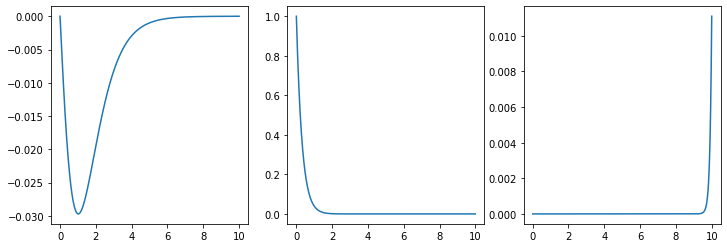

In [44]:
n = 1000

x, y0 = calc_y0(n)
y1 = calc_y1(n)
y2 = calc_y2(n)

f, axs = plt.subplots(1,3,figsize=(12,4))
axs[0].plot(x, y0)
axs[1].plot(x, y1)
axs[2].plot(x, y2)


если хочу поставить краевые условия $y(0) =1, y(10)=2$, нужно найти константы c1 с2

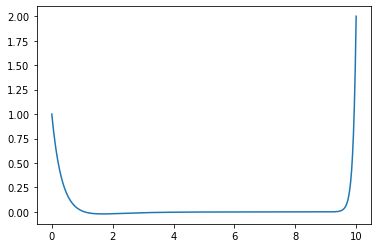

In [45]:
A = np.array([[y1[0], y2[0]],
              [y1[n-1], y2[n-1]]])
b = np.array([1,2])

c = np.linalg.solve(A,b)
c

plt.plot(x, y0+c[0]*y1+c[1]*y2)

в

In [ ]:
def calc_y(y0, y1, N = 400, end=10):
    h = end / N

    t = np.linspace(0, end, N)

    y = np.empty(N)
    v = np.empty(N)

    y[0] = y0
    y[1] = y1
    v[0] = (y[1] - y[0])/h

    for i in range(2,N):
        y[i] = (t[i-1]*np.exp(-t[i-1]) - (10+t[i-1]**2)*y[i-1])*h*h - y[i-2] + 2*y[i-1]
        v[i] = (y[i] - y[i-1])/h

    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].plot(t, y)
    axs[1].plot(y, v)


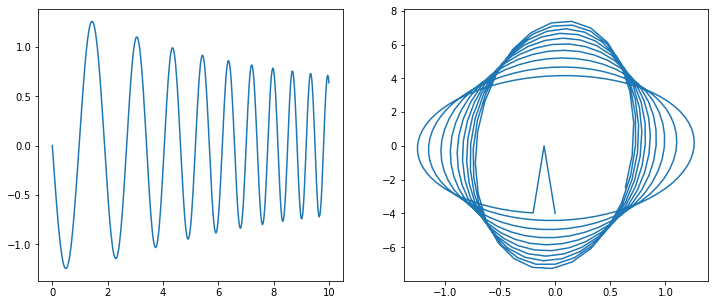

In [ ]:
calc_y(0, -0.1)

#9.3a


метод стрельбы 

$y'' = t \sqrt{y}$ 

$y(0) = 0, y(1) = 2$, $t \in [0,1]$


$\frac{1}{h^2} (y_{n+1} - 2y_n + y_{n-1}) = t_n \sqrt{y_n}$

In [ ]:
def solve(a, N = 400):
    h = 1/N
    t, y = np.linspace(0, 1, N), np.linspace(0, 1, N)

    y[0] = 0
    y[1] = h*a

    for i in range(2,N):
        y[i] = (t[i-1]*np.sqrt(y[i-1]))*h*h - y[i-2] + 2*y[i-1]

    # plt.figure(figsize=(6, 4))
    # plt.plot(t, y)

    return y[N-1]

как выглядит зависимость $y(1, \alpha)$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


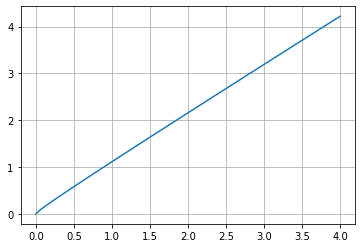

In [ ]:
a1 = np.linspace(-2, 4, 100)
y1 = np.array([])

for i in a1:
    y1 = np.append(y1, solve(i))

plt.plot(a1, y1)
plt.grid()
plt.show()

точность y(1) = 2 пусть $\varepsilon = 10^{-3}$

решаем делением отрезка пополам  [1,3]

In [ ]:
eps = 1e-3

b, c = 1,3
a = 2

while abs(solve(a) - 2) > eps:
    if solve(a) > 2:
        c = a
    else:
        b = a
    a = (b+c)/2

print("a = ", a,"\n y(1, a) = ", solve(a))

a =  1.84765625 
 y(1, a) =  1.9992923215595264
